<a href="https://colab.research.google.com/github/EzpieCo/PyTorch-Crash-Course/blob/main/02-pytorch-worflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 PyTorch Workflow

GitHub repository: https://github.com/EzpieCo/PyTorch-Crash-Course

Crash Course: https://ezpie.vercel.app/courses/machine-learning

In case of an question: https://github.com/EzpieCo/PyTorch-Crash-Course/discussions

---

Every machine learning engineer or deep learning engineer has one essence, that is to take data, build
a model(neural network) to understand patterns in that data and predict what the value will be of an unseen data.

From the next chapter onward we will focus more on the fun part, that is making data, building a model to understand that data and predict with data.

To Start of **straight** and simple we will learn how to make a model that can predict values in a straight line, a simple straight line.

We will build a pytorch model that will learn the pattern in that straight line and make predictions.

# The simple workflow

We will cover a really, yet a very common workflow, with the help of which we will create our model.

![most common pytorch workflow](https://github.com/EzpieCo/PyTorch-Crash-Course/blob/main/images/pytorch-workflow.svg?raw=1)

## Chapter: Preparing data and loading data

Data refers to the information that we use to train, validate, and test our machine learning models. It serves as the foundation for making predictions, gaining insights, and solving real-world problems using machine learning techniques.

Data can come in various forms, such as structured, unstructured, or semi-structured. Structured data is organized and follows a predefined format, typically stored in databases or tabular formats like CSV files. Unstructured data, on the other hand, lacks a specific structure and can include text, images, audio, video, or free-form documents. Semi-structured data lies in between, having some organization but not conforming strictly to a predefined schema.

Hence data an be anything

- Audio
- Video
- Text
- Image

Machine learning is all about:

- Getting data and turning it into numarical values
- Building a model that can learn patterns in that data

For this we will create a linear regression model aka model that will predict values in a stright line.

In [17]:
# importing dependencies
import torch
from torch import nn # nn, short for neural network, is the main building block of neural networks.
import matplotlib.pyplot as plt

# Checking pytorch version

torch.__version__ # version 2.0.1 above will work fine

'2.0.1+cu118'

### Creating the values

In [18]:
# Creating weight and bais
weight = 0.5 # Can be anything, but line will differ
bais = 0.2 # same with the bais

# Creating the features and labels
X = torch.arange(0, 1, 0.02).unsqueeze(1) # remove all the 1 dimensions

# linear regression formula: y = b + wx ... wx*n* (number of times) 
y = bais + (weight * X)

In [19]:
#@title Getting to know our data

# getting the first 10 values
print(f"first ten features: {X[:10]}")
print(f"first ten labels: {y[:10]}")

# checking lenght of features and labels
print(f"number of features: {len(X)}")
print(f"number of labels: {len(y)}")

# Checking the shape of our data
print(f"shape of features: {X.shape}")
print(f"shape of labels: {y.shape}")

first ten features: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
first ten labels: tensor([[0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900]])
number of features: 50
number of labels: 50
shape of features: torch.Size([50, 1])
shape of labels: torch.Size([50, 1])


### Spliting the values in training and testing sets

We will split data into training and testing sets, which are the most common, validation set can be made, but for this small data not required.

We will use the python's [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for this.

In [20]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, # 0.2/20% of data will be for testing and 80% will be for training
                                                    random_state=46) # changes the testing data, but stays same if value same

### Creating a plot function to plot our data

First rule of machine learning is 'Visulize your data'

Visulize the data first, so that you know what will suit the best.

In [21]:
# Ploting function
def plot(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test, 
                     predictions=None):
  
  plt.figure(figsize=(10, 7))

  # training data in green
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")
  
  # test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="Test data")

  if predictions != None:
    # Plot the predictions in blue
    plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

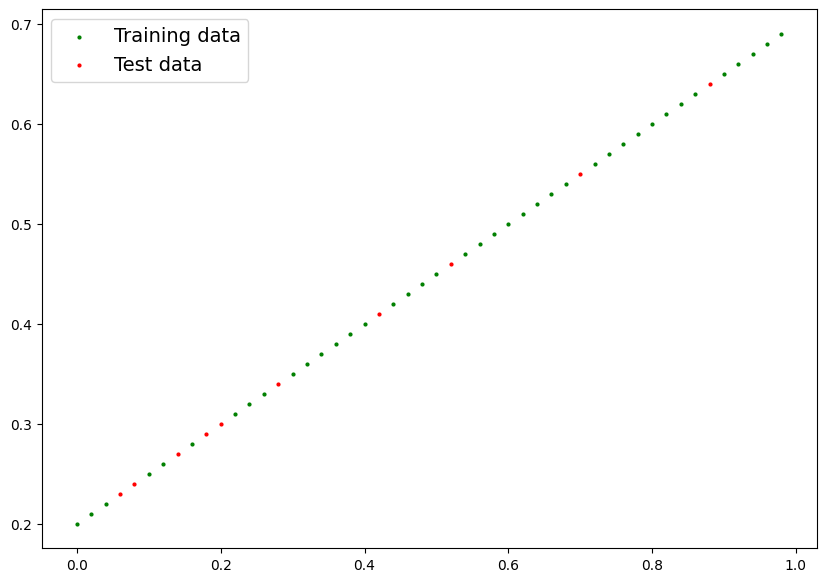

In [22]:
plot() # Checking out our data

## Chapter: Building the model

In order to build a model, or more exacly the neural network, we use, only in pytorch, `torch.nn`, `nn` is the base class of building neural network.

What our model does for now:

- Starts with random weight and bais, 0 for weight and 0 for bais.
- Looks at the training data(we will make that) then adjust the weight and bais by checking the loss(will get to that)

In [23]:
# One way of making a neural network, simplest define the parameters yourself
class LinearModel(nn.Module): # Base class of building neural network(nn gives the name)
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(0,  dtype=float, requires_grad=True)) # The weight for our model. Weight we will randomly change
    self.bais = nn.Parameter(torch.rand(0, dtype=float, requires_grad=True)) # The bais for our model. Bais we will randomly change

  def forward(self, x): # Forward pass aka the linear regression formula
    return self.bais + (self.weight * x) # linear regression formula

In [24]:
# Creating an instance
model1 = LinearModel()
print(model1)

# Checking the parameters
list(model1.parameters())

LinearModel()


[Parameter containing:
 tensor([], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([], dtype=torch.float64, requires_grad=True)]

In [25]:
# Other most common way to make a model
class LinearModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1, 1) # Takes an input, 1 because we have 1 X feature. Gives an output, 1 because we are predicting 1 y label

  def forward(self, x):
    return self.layer1(x)

In [26]:
# Manual seed, needed in order to make the random tensors same, as long as the random seed stays the same. Same as random state
torch.manual_seed(32)

# Creating the instance
model2 = LinearModelV2()
print(model2)

# Checking out the parameters
list(model2.parameters()) # random tensors, cause the in the first model we defined the parameters with value zero

LinearModelV2(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
)


[Parameter containing:
 tensor([[0.7513]], requires_grad=True),
 Parameter containing:
 tensor([-0.4559], requires_grad=True)]

## Training the model

In training we will give our model chance to check the dataset and learn patterns in it.

#### Checking how to model performs without training

This is no how important, yet is a nice way to know how a neural network starts and learns

In [27]:
with torch.inference_mode():
  y_preds = model2(X_test)

y_preds[:5], y_test[:5] # Checking the first 5 values

(tensor([[-0.3206],
         [-0.2455],
         [-0.4108],
         [ 0.0700],
         [-0.3056]]),
 tensor([[0.2900],
         [0.3400],
         [0.2300],
         [0.5500],
         [0.3000]]))

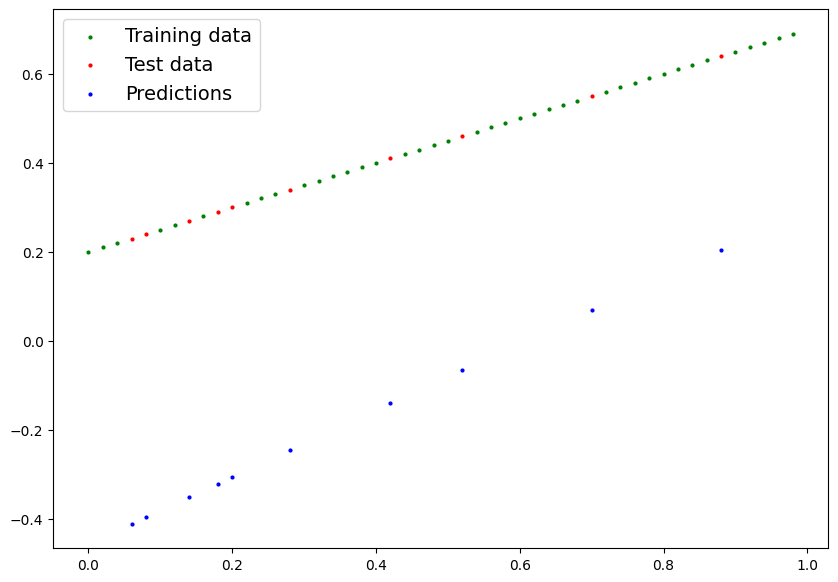

In [28]:
# Ploting the values to check how far are the values
plot(predictions=y_preds)

### Important parts of a training a model

In order to train our model we will need to perform few actions, which are as following:

1. Perform forward pass
2. perform the loss function
3. perform the gradent descent
4. perform backpropagation
5. Update the model parameters

To know more about loss function - https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

To know more about backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=1s

To know more about gradent descent - https://www.youtube.com/watch?v=i62czvwDlsw

#### Setting up the loss function and optimizer

Check the number of loss functions you can pick from - https://pytorch.org/docs/stable/nn.html#loss-functions
Check the number of optimizer(gradent descent) you can pick from - https://pytorch.org/docs/stable/optim.html#algorithms

For our purpose we will use the L1Loss(MSE) and SGD(stochastic gradient descent)

In [29]:
# Setup the loss function
lossFunction = nn.L1Loss() # L1Loss/MSE means Mean Absolute Error

# setup the optimizer/gradent descent
optimizer = torch.optim.SGD(model2.parameters(), # The weights and baises to be adjusted
                            0.01) # The learning rate is by how much the weights and baises will be changed

In [30]:
def trainer(epochs=10): # Number of times the model will loop over the training data

  for epoch in range(epochs):
    # Set the model in training mode
    model2.train()

    # 1. preform the forward pass
    y_pred = model2(X_train) # give the model the training features

    # 2. perform the loss function
    train_loss = lossFunction(y_pred, y_train) # give the loss function the predicted values and the actural values

    # 3. Perform the gradent descent
    optimizer.zero_grad()

    # 4. Perform the backpropagation
    train_loss.backward()

    # 5. update the model parameters
    optimizer.step()

    # Testing loop
    # Set the model to testing mode
    model2.eval()

    with torch.inference_mode():
      # 1. perform the forward pass
      test_pred = model2(X_test)

      # 2. perform the loss function
      test_loss = lossFunction(test_pred, y_test)
    
      # Printing data
      if epoch < 30:
        print(f'Epoch: {epoch} | Training loss: {train_loss:.3f} | Testing loss: {test_loss:.3f}')
        
      elif epoch > 30 and epoch < 100:
          if epoch % 10 == 0:
            print(f'Epoch: {epoch} | Training loss: {train_loss:.3f} | Testing loss: {test_loss:.3f}')
          
      elif epoch > 100:
          if epoch % 100 == 0:
            print(f'Epoch: {epoch} | Training loss: {train_loss:.3f} | Testing loss: {test_loss:.3f}')


trainer()

Epoch: 0 | Training loss: 0.524 | Testing loss: 0.557
Epoch: 1 | Training loss: 0.511 | Testing loss: 0.545
Epoch: 2 | Training loss: 0.498 | Testing loss: 0.533
Epoch: 3 | Training loss: 0.485 | Testing loss: 0.522
Epoch: 4 | Training loss: 0.473 | Testing loss: 0.510
Epoch: 5 | Training loss: 0.460 | Testing loss: 0.498
Epoch: 6 | Training loss: 0.447 | Testing loss: 0.486
Epoch: 7 | Training loss: 0.434 | Testing loss: 0.474
Epoch: 8 | Training loss: 0.422 | Testing loss: 0.463
Epoch: 9 | Training loss: 0.409 | Testing loss: 0.451


### Ploting How well is our model doing now

Now that we have trained our model, it must have learned some patterns in it, let's try ploting how well is it doing

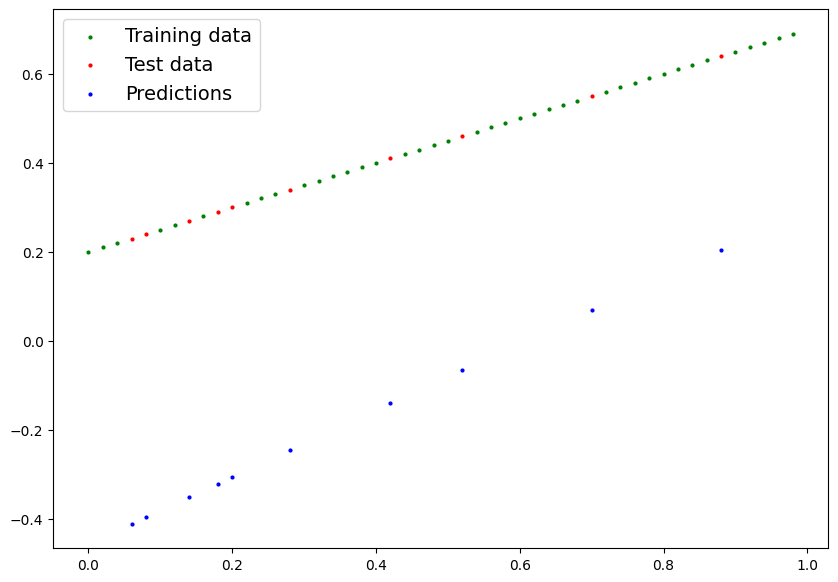

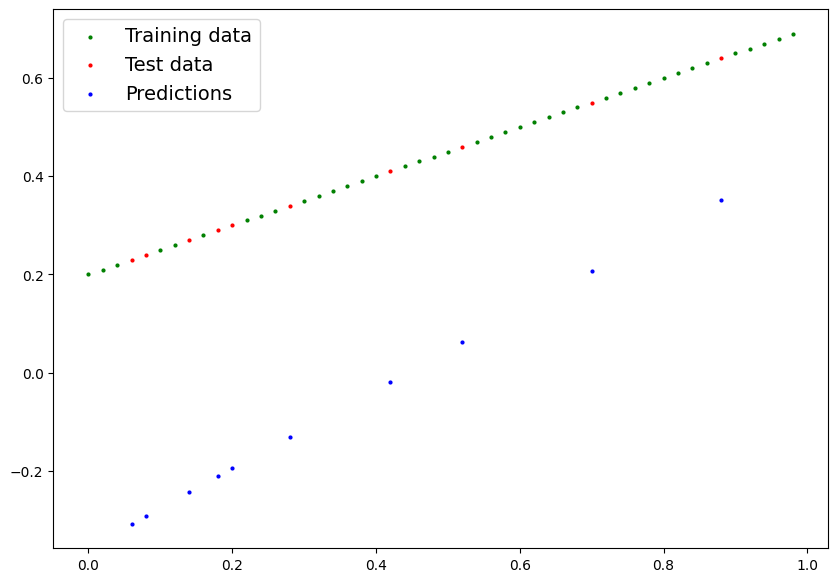

In [31]:
with torch.inference_mode():
  new_preds = model2(X_test)

plot(predictions=y_preds) # our old predictions
plot(predictions=new_preds) # our new predictions

### Imporving our model

Or model haven't really imporved much, cause even the loss was not close to 0. Let's try improving our model by increasing the number of times it will loop over the dataset.

Since our epochs is quite less it might have made the training also week

Epoch: 0 | Training loss: 0.396 | Testing loss: 0.439
Epoch: 1 | Training loss: 0.383 | Testing loss: 0.427
Epoch: 2 | Training loss: 0.370 | Testing loss: 0.415
Epoch: 3 | Training loss: 0.358 | Testing loss: 0.403
Epoch: 4 | Training loss: 0.345 | Testing loss: 0.392
Epoch: 5 | Training loss: 0.332 | Testing loss: 0.380
Epoch: 6 | Training loss: 0.319 | Testing loss: 0.368
Epoch: 7 | Training loss: 0.307 | Testing loss: 0.356
Epoch: 8 | Training loss: 0.294 | Testing loss: 0.344
Epoch: 9 | Training loss: 0.281 | Testing loss: 0.333
Epoch: 10 | Training loss: 0.268 | Testing loss: 0.321
Epoch: 11 | Training loss: 0.256 | Testing loss: 0.309
Epoch: 12 | Training loss: 0.243 | Testing loss: 0.297
Epoch: 13 | Training loss: 0.230 | Testing loss: 0.285
Epoch: 14 | Training loss: 0.217 | Testing loss: 0.273
Epoch: 15 | Training loss: 0.205 | Testing loss: 0.262
Epoch: 16 | Training loss: 0.192 | Testing loss: 0.250
Epoch: 17 | Training loss: 0.179 | Testing loss: 0.238
Epoch: 18 | Training

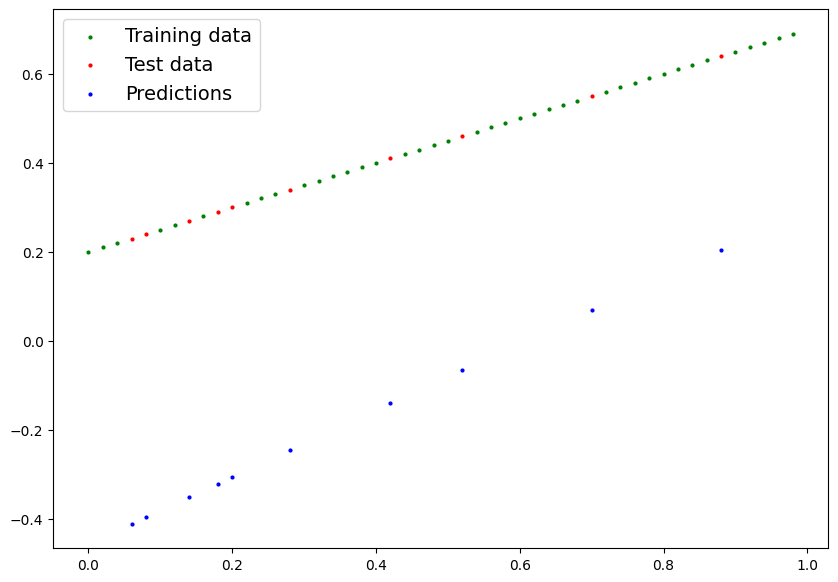

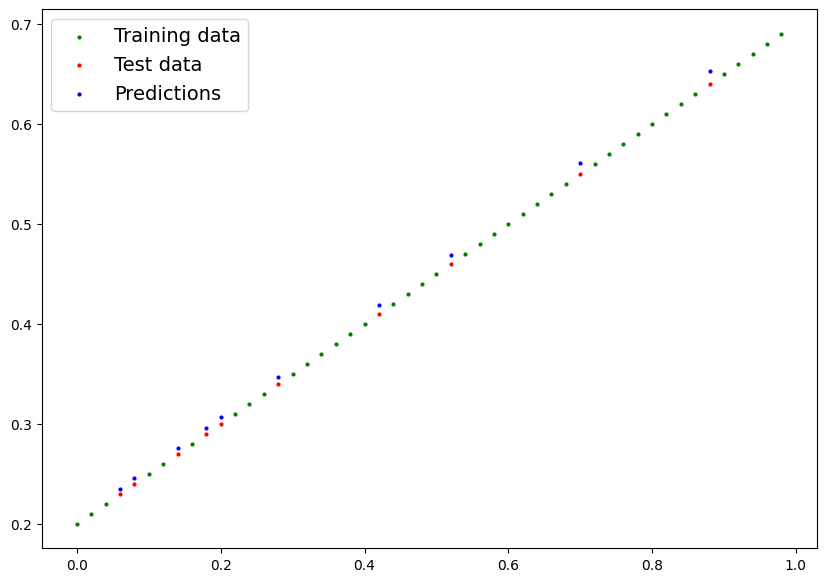

In [32]:
# increasing the number of epochs so that our model gets more learning loops
trainer(1000) # Let's train the model for a 1000 more times

# Ploting the newer predictions and compare with the old one
with torch.inference_mode():
  new_preds = model2(X_test)

plot(predictions=y_preds) # our old predictions
plot(predictions=new_preds) # our new predictions